In [40]:
import torch
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [41]:
cars_data=pd.read_csv("./cars.csv")
cars_data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [42]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [43]:
cars_data.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [44]:
cars_data.isna().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [45]:
cleaned_cars_data=cars_data.dropna(axis=0)
cleaned_cars_data.isna().sum()


Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

In [46]:
cleaned_cars_data.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [47]:
# number of values for each tyype
for c in cleaned_cars_data:
    print(f"{c}: {len(cleaned_cars_data[c].unique())}") 

Make: 47
Model: 713
Year: 28
Engine Fuel Type: 8
Engine HP: 327
Engine Cylinders: 9
Transmission Type: 5
Driven_Wheels: 4
Number of Doors: 3
Market Category: 70
Vehicle Size: 3
Vehicle Style: 16
highway MPG: 44
city mpg: 50
Popularity: 47
MSRP: 4644


In [48]:
cleaned_cars_data.head(1)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135


Text(0.5, 1.0, 'Number of cars by Years')

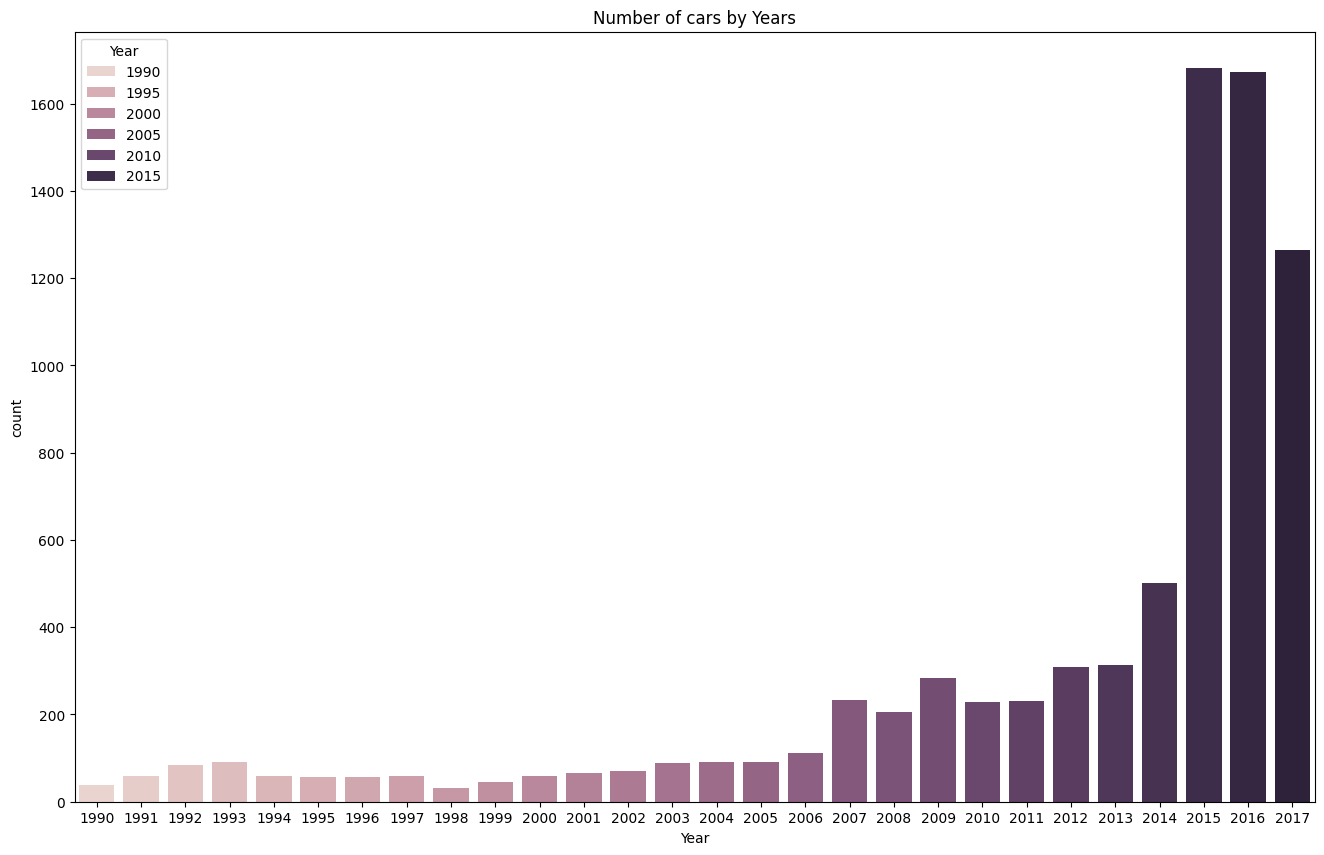

In [49]:
plt.figure(figsize=(16,10))
sns.countplot(x="Year",data=cleaned_cars_data,hue="Year")
plt.title("Number of cars by Years")

Text(0.5, 1.0, 'Number of cars for each Engine Fuel Type')

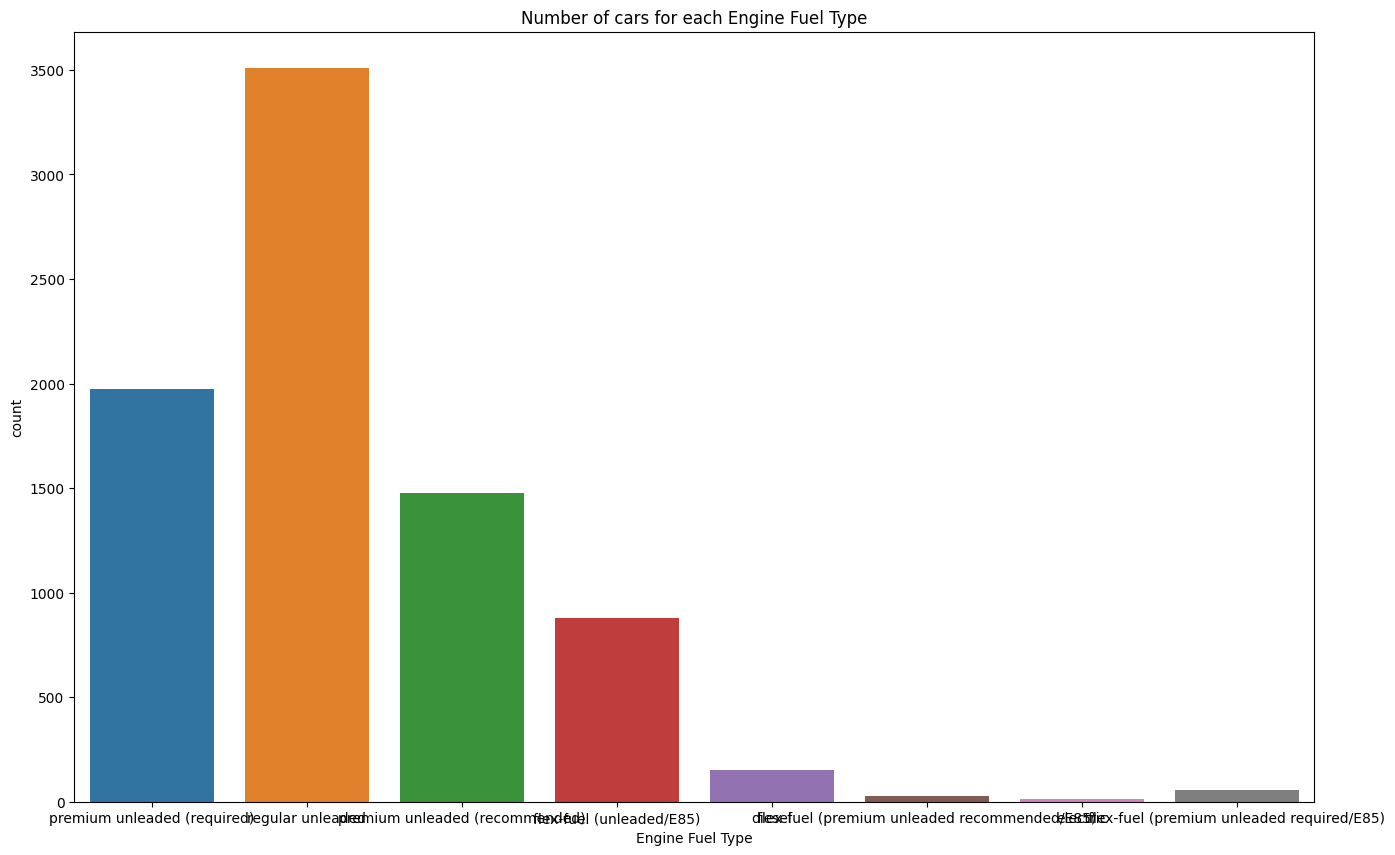

In [50]:
plt.figure(figsize=(16,10))
sns.countplot(x="Engine Fuel Type",data=cleaned_cars_data,hue="Engine Fuel Type")
plt.title("Number of cars for each Engine Fuel Type")

Text(0.5, 1.0, 'Number of vehicules by Size')

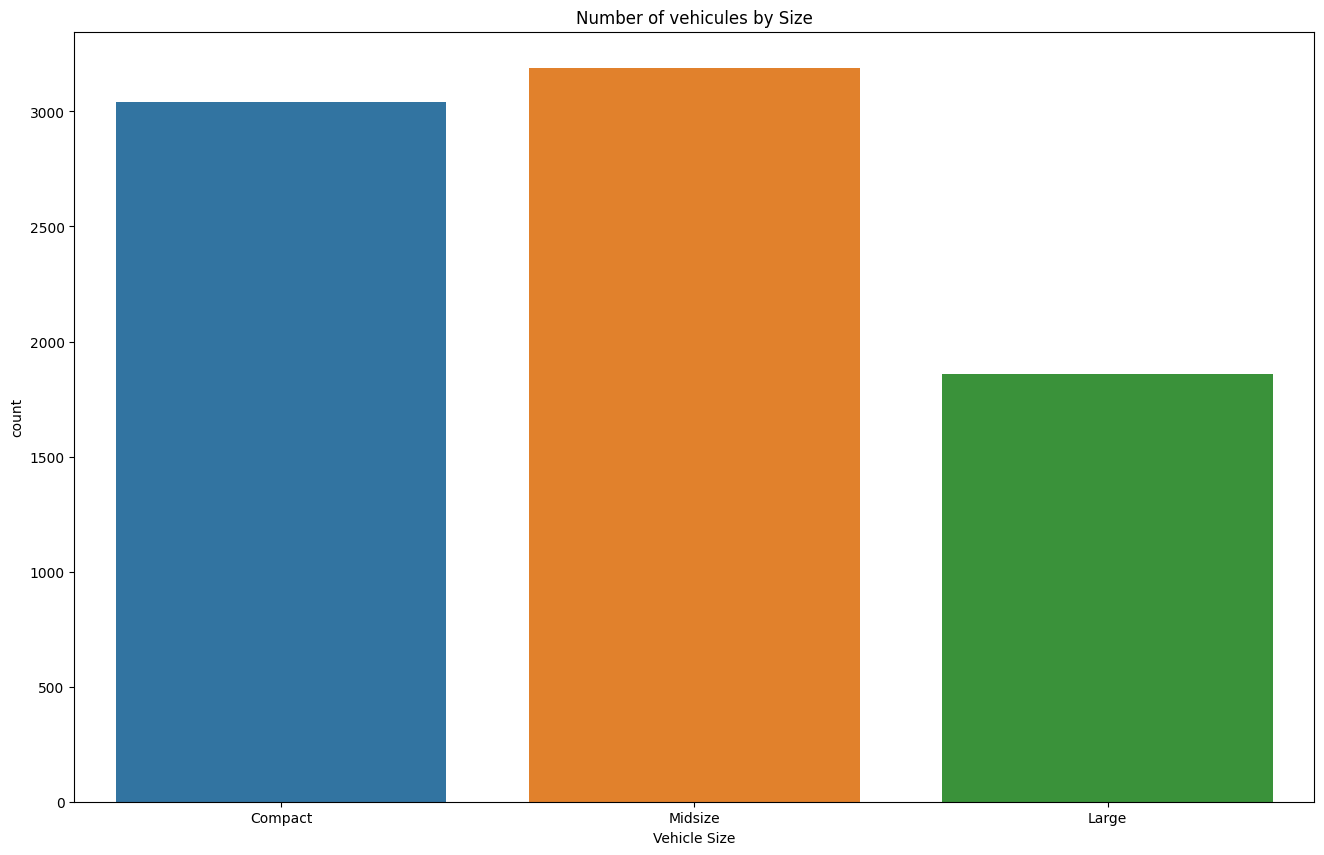

In [51]:
plt.figure(figsize=(16,10))
sns.countplot(x="Vehicle Size",data=cleaned_cars_data,hue='Vehicle Size')
plt.title("Number of vehicules by Size")

Text(0.5, 1.0, 'Number of vehicules by cylinders')

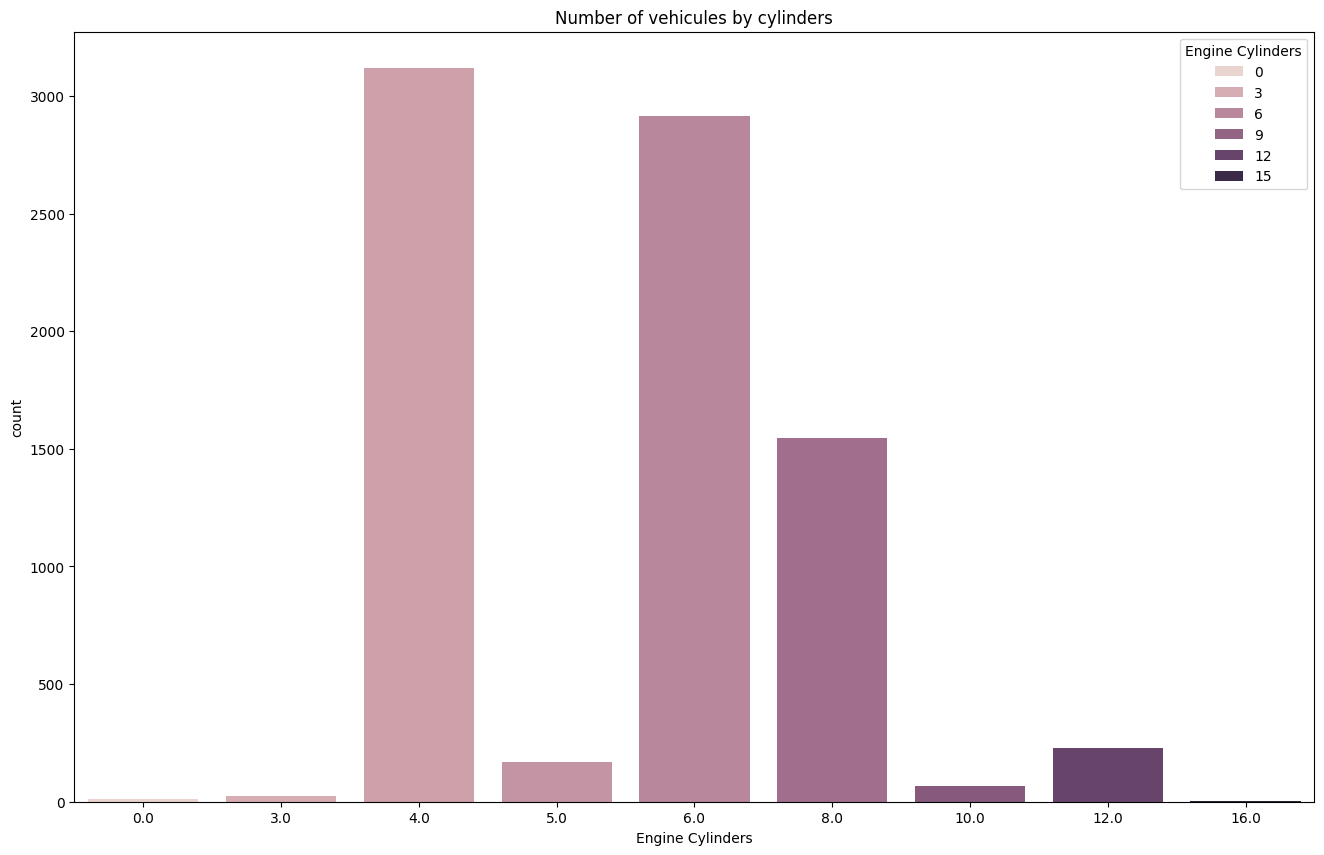

In [52]:
plt.figure(figsize=(16,10))
sns.countplot(x="Engine Cylinders",data=cleaned_cars_data,hue="Engine Cylinders")
plt.title("Number of vehicules by cylinders")

Text(0.5, 1.0, 'Number of vehicules by Transmission Type')

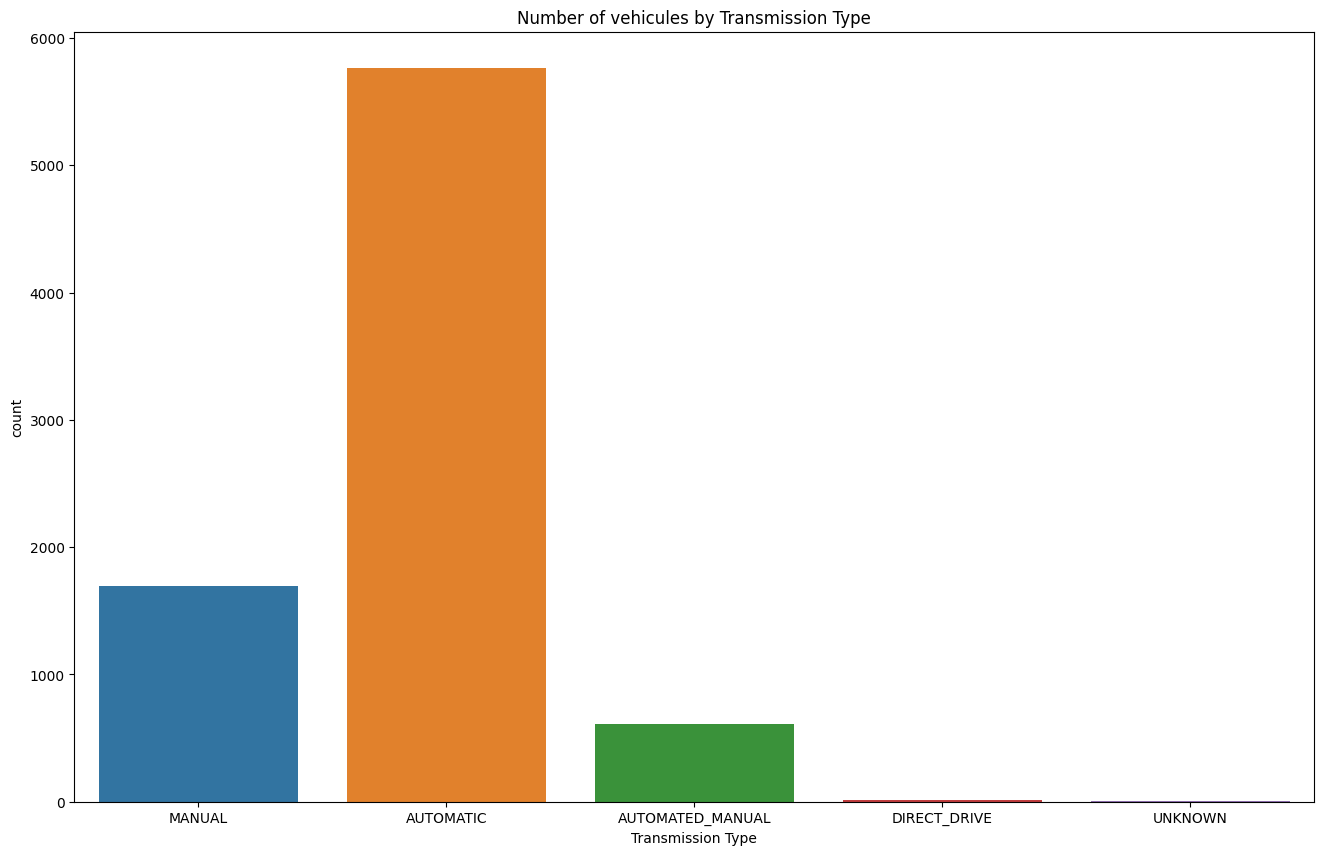

In [53]:
plt.figure(figsize=(16,10))
sns.countplot(x="Transmission Type",data=cleaned_cars_data,hue="Transmission Type")
plt.title("Number of vehicules by Transmission Type")


In [54]:
cleaned_cars_data.head(1)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135


Text(0.5, 1.0, 'distributuiosns cars by horse power')

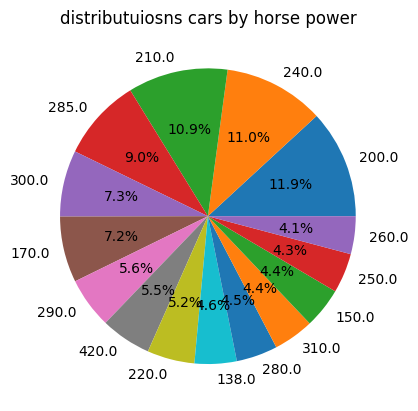

In [55]:
expensive_cars=cleaned_cars_data["Engine HP"].value_counts().sort_values(ascending=False).reset_index(name="vehicule count").head(15)
expensive_cars
plt.pie(x=expensive_cars["vehicule count"],labels=expensive_cars["Engine HP"],autopct="%1.1f%%")
plt.title("distributuiosns cars by horse power")

In [56]:
best_car_hp=cleaned_cars_data[cleaned_cars_data["Engine HP"]==cleaned_cars_data["Engine HP"].max()]
best_car_hp

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11362,Bugatti,Veyron 16.4,2008,premium unleaded (required),1001.0,16.0,AUTOMATED_MANUAL,all wheel drive,2.0,"Exotic,High-Performance",Compact,Coupe,14,8,820,2065902
11363,Bugatti,Veyron 16.4,2008,premium unleaded (required),1001.0,16.0,AUTOMATED_MANUAL,all wheel drive,2.0,"Exotic,High-Performance",Compact,Coupe,14,8,820,1500000
11364,Bugatti,Veyron 16.4,2009,premium unleaded (required),1001.0,16.0,AUTOMATED_MANUAL,all wheel drive,2.0,"Exotic,High-Performance",Compact,Coupe,14,8,820,1705769


In [57]:
worst_car_hp=cleaned_cars_data[cleaned_cars_data["Engine HP"]==cleaned_cars_data["Engine HP"].min()]
worst_car_hp

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
6794,Chevrolet,Metro,1999,regular unleaded,55.0,3.0,MANUAL,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,42,34,1385,2000
6798,Chevrolet,Metro,2000,regular unleaded,55.0,3.0,MANUAL,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,41,32,1385,2000


Text(0.5, 1.0, 'Cars transmission by Years')

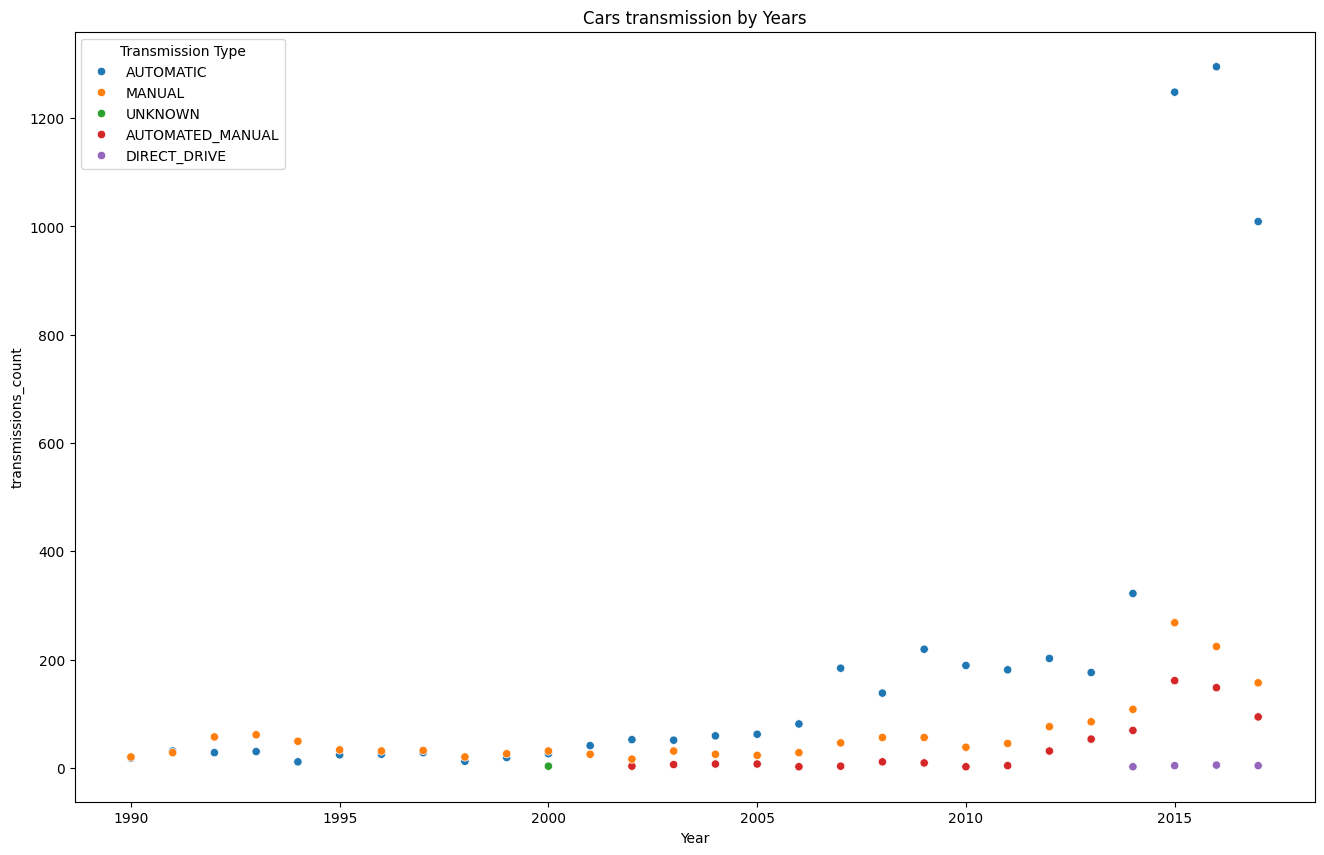

In [58]:
plt.figure(figsize=(16,10))
transimissions_by_year=cleaned_cars_data.groupby(["Year","Transmission Type"])["Transmission Type"].count().reset_index(name="transmissions_count")
transimissions_by_year
sns.scatterplot(transimissions_by_year,x="Year",y="transmissions_count",hue="Transmission Type")
plt.title("Cars transmission by Years")

In [59]:
cleaned_cars_data.head(1)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135


In [60]:
cars_by_popluarity=cleaned_cars_data["Vehicle Style"].value_counts().reset_index(name="cars_count")
cars_by_popluarity


,Vehicle Style,cars_count
0,4dr SUV,2093
1,Sedan,1909
2,Coupe,939
3,4dr Hatchback,678
4,Convertible,670
5,2dr Hatchback,503
6,Wagon,357
7,Crew Cab Pickup,344
8,Extended Cab Pickup,191
9,Regular Cab Pickup,176


In [61]:
cleaned_cars_data.head(1)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135


Text(0.5, 1.0, 'cars by Vehicule types')

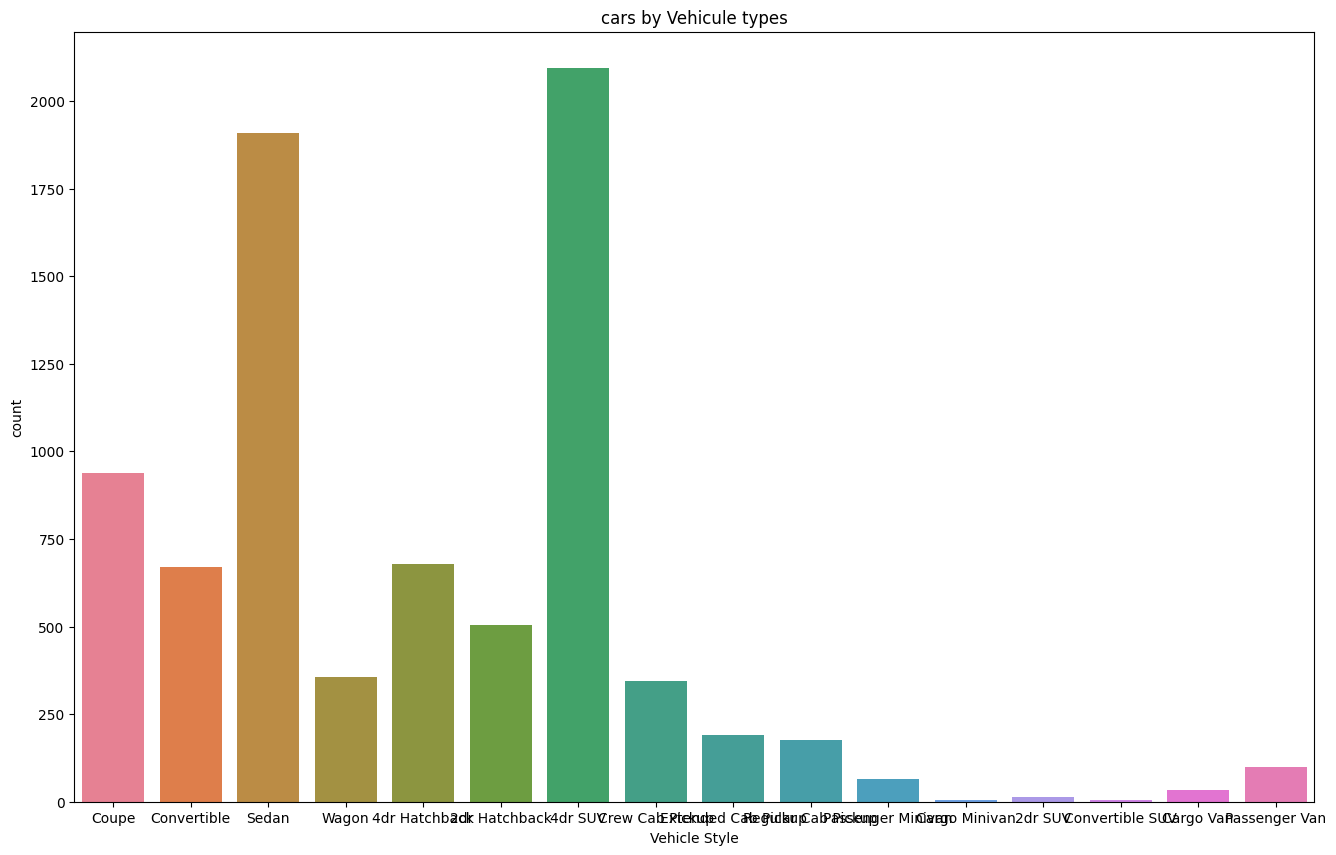

In [62]:
plt.figure(figsize=(16,10))
sns.countplot(x="Vehicle Style",data=cleaned_cars_data,hue="Vehicle Style")
plt.title("cars by Vehicule types")

Text(0.5, 1.0, 'Cars popularity')

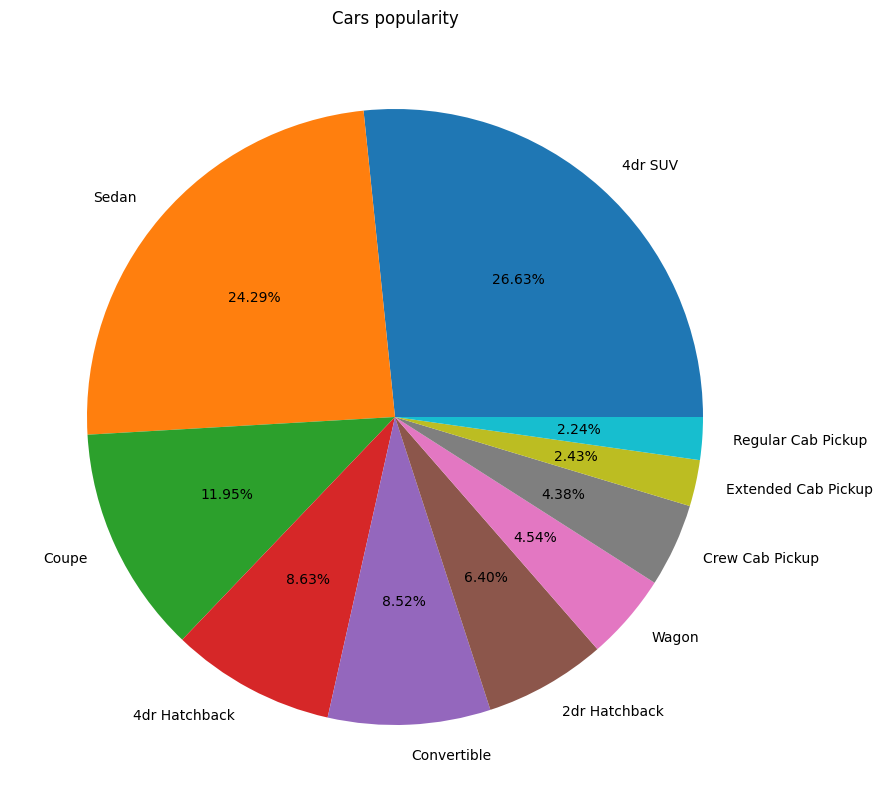

In [63]:
plt.figure(figsize=(16,10))
plt.pie(x=cars_by_popluarity["cars_count"].head(10),labels=cars_by_popluarity["Vehicle Style"].head(10),autopct="%1.2f%%")
plt.title("Cars popularity")

In [64]:
cars_by_Make=cleaned_cars_data["Make"].value_counts().sort_values(ascending=False).reset_index(name="count").head(20)
cars_by_Make


,Make,count
0,Chevrolet,614
1,Volkswagen,581
2,Ford,492
3,Cadillac,397
4,Mercedes-Benz,352
5,BMW,334
6,Infiniti,330
7,Audi,328
8,Dodge,320
9,Nissan,308


Text(0.5, 1.0, 'Best cars makers')

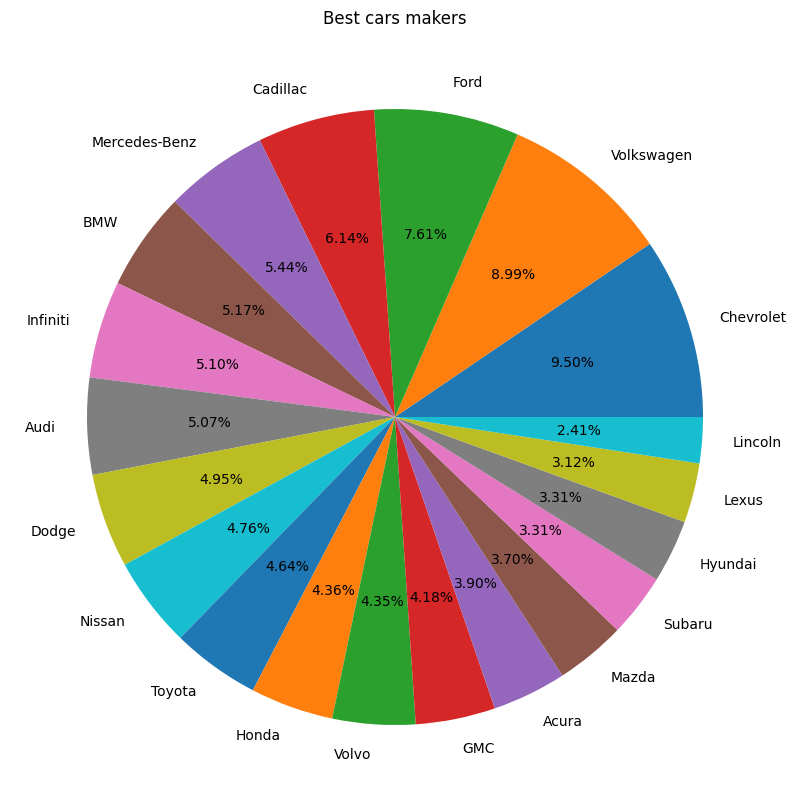

In [65]:
plt.figure(figsize=(16,10))
plt.pie(x=cars_by_Make["count"],labels=cars_by_Make["Make"],autopct="%1.2f%%")
plt.title("Best cars makers")

In [66]:
cleaned_cars_data.head(1)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135


Text(0.5, 1.0, 'Engines by Hp')

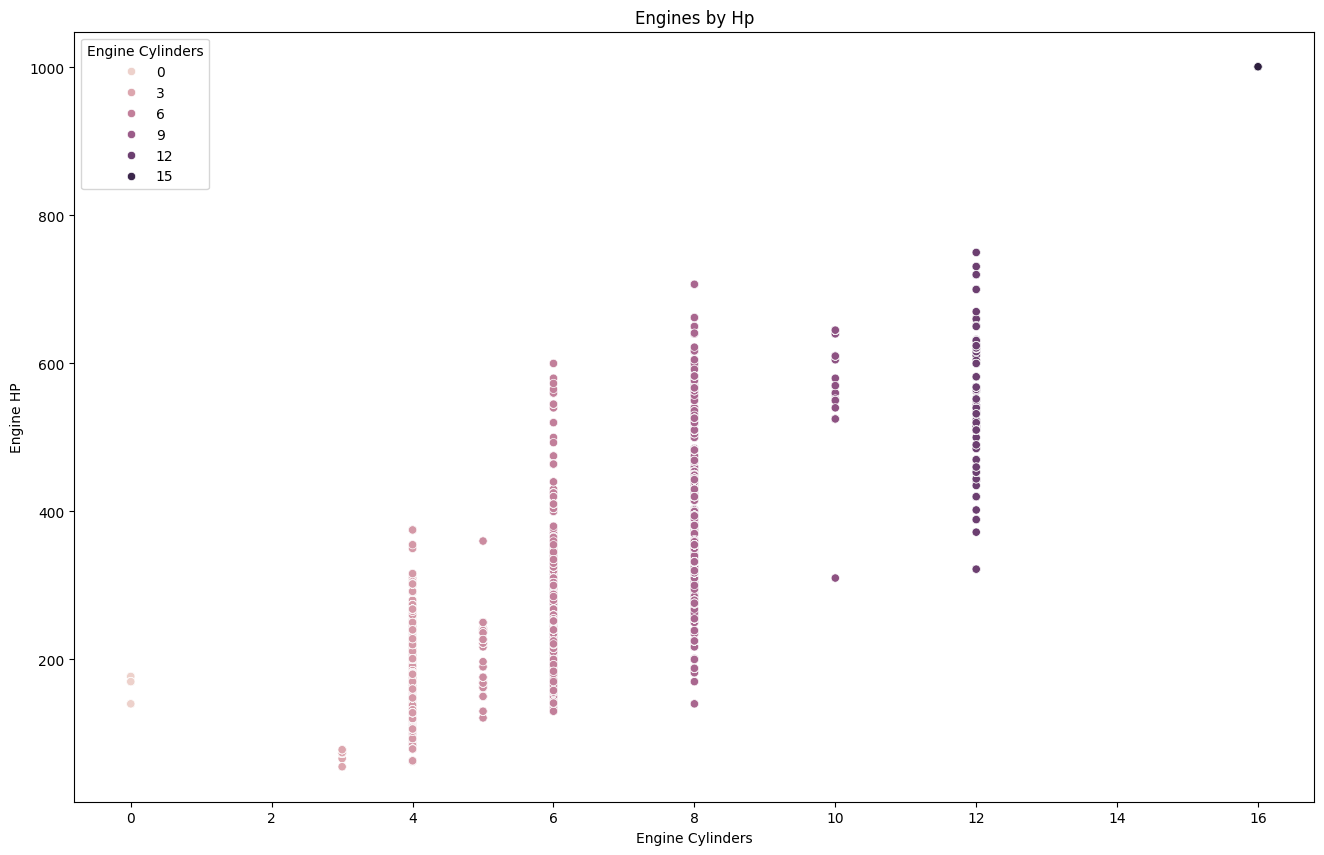

In [67]:
plt.figure(figsize=(16,10))
sns.scatterplot(cleaned_cars_data,x="Engine Cylinders",y="Engine HP",hue="Engine Cylinders")
plt.title("Engines by Hp")



In [68]:
cleaned_cars_data.head(1)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135


In [69]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


In [70]:
data_frame=cleaned_cars_data[['Engine HP',"Engine Cylinders"]]
data_frame["Engine HP"].value_counts()


Engine HP
200.0    281
240.0    261
210.0    259
285.0    213
300.0    172
        ... 
66.0       1
424.0      1
661.0      1
451.0      1
535.0      1
Name: count, Length: 327, dtype: int64

In [71]:
data_frame["Engine Cylinders"].value_counts()

Engine Cylinders
4.0     3117
6.0     2913
8.0     1545
12.0     229
5.0      170
10.0      68
3.0       26
0.0       13
16.0       3
Name: count, dtype: int64

In [72]:
x=cleaned_cars_data[["Engine HP"]]
y=cleaned_cars_data[["Engine Cylinders"]]

In [73]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [74]:
model=RandomForestClassifier(n_estimators=150)
model.fit(x_train,y_train)

c:\Users\izuna\miniconda3\envs\torch-env\Lib\site-packages\sklearn\base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,n_estimators,150
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [81]:
import pickle
with open('cars_model.pkl',"wb") as f:
    pickle.dump(model,f)

In [3]:
import fastapi

ModuleNotFoundError: No module named 'fastapi'

In [75]:
predictions=model.predict(x_test)
predictions

array([4., 6., 6., ..., 4., 8., 8.], shape=(1617,))

In [76]:
from sklearn.metrics import accuracy_score,classification_report

In [77]:
print("Accuracy:", accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy: 0.8181818181818182
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         3
         3.0       1.00      1.00      1.00         5
         4.0       0.86      0.91      0.89       606
         5.0       0.00      0.00      0.00        30
         6.0       0.81      0.81      0.81       597
         8.0       0.77      0.75      0.76       316
        10.0       0.60      0.60      0.60        15
        12.0       0.74      0.87      0.80        45

    accuracy                           0.82      1617
   macro avg       0.60      0.62      0.61      1617
weighted avg       0.80      0.82      0.81      1617



c:\Users\izuna\miniconda3\envs\torch-env\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\izuna\miniconda3\envs\torch-env\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\izuna\miniconda3\envs\torch-env\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is

ModuleNotFoundError: No module named 'fastapi'